# Problem 2

## 1. Theoretical Foundation

### Differential Equation

The differential equation governing the motion of a forced damped pendulum is:

$\frac{d^2\theta}{dt^2} + b\frac{d\theta}{dt} + \frac{g}{L}\sin(\theta) = A\cos(\omega t)$

Where:

* $\theta$ is the angular displacement.
* $b$ is the damping coefficient.
* $g$ is the acceleration due to gravity.
* $L$ is the length of the pendulum.
* $A$ is the driving amplitude.
* $\omega$ is the driving frequency.

### Small-Angle Approximation

For small angles, $\sin(\theta) \approx \theta$. The equation simplifies to:

$\frac{d^2\theta}{dt^2} + b\frac{d\theta}{dt} + \frac{g}{L}\theta = A\cos(\omega t)$

### Approximate Solutions

The general solution is the sum of the homogeneous (transient) and particular (steady-state) solutions.

### Resonance Conditions

Resonance occurs when $\omega \approx \sqrt{g/L}$, leading to maximum amplitude oscillations.

## 2. Analysis of Dynamics

* **Damping Coefficient (b):** Influences the rate of decay of oscillations.
* **Driving Amplitude (A):** Affects the amplitude of oscillations and can lead to nonlinear behavior.
* **Driving Frequency (ω):** Determines the system's response; resonance occurs when $\omega$ is close to the natural frequency.
* **Transition to Chaos:** Can be observed through phase portraits, Poincaré sections, and bifurcation diagrams.

## 3. Practical Applications

* Energy harvesting devices
* Suspension bridges
* Oscillating circuits
* Metronomes
* Various mechanical systems

## 4. Implementation



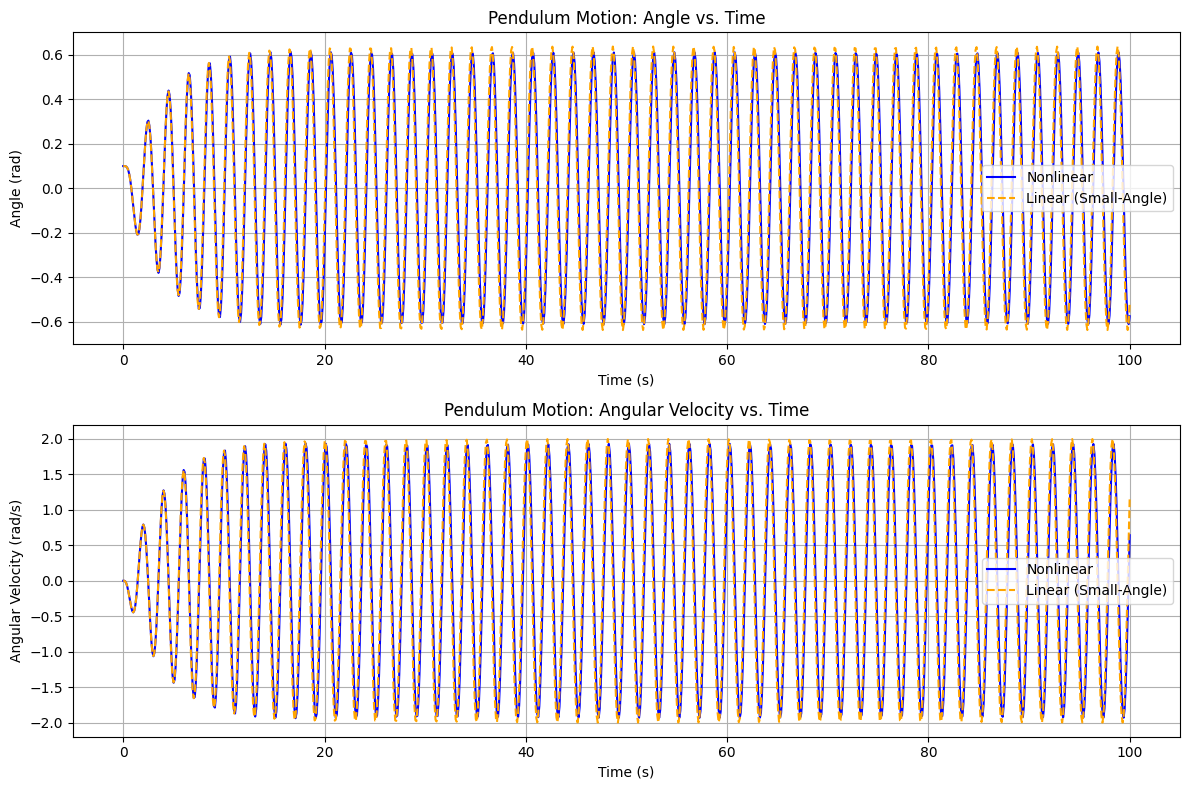

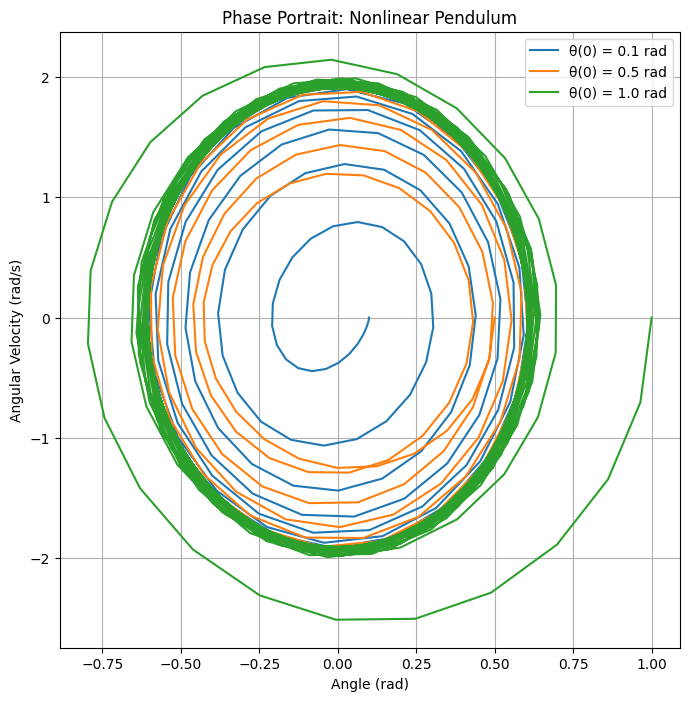

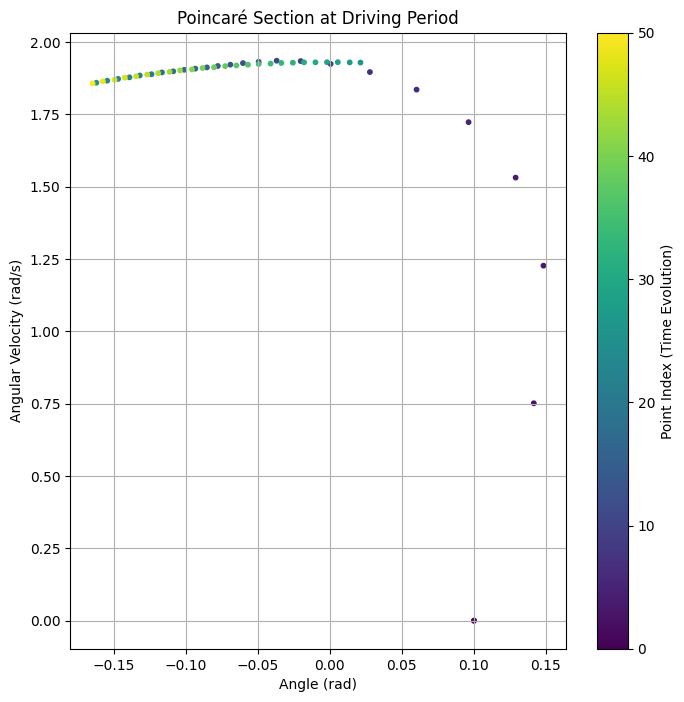

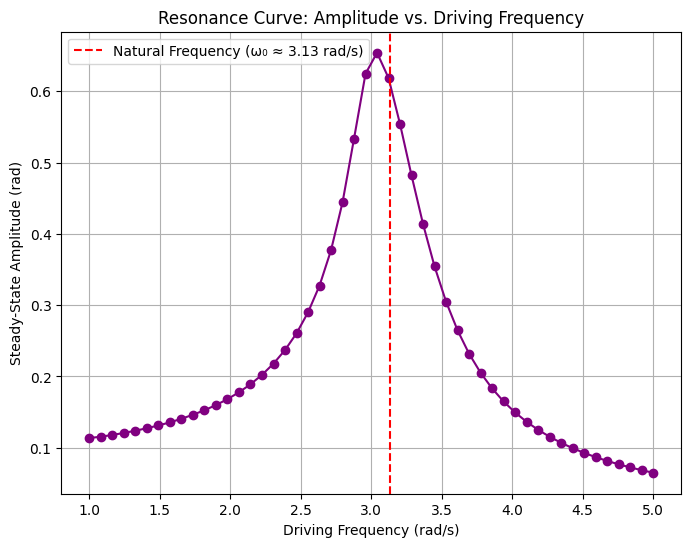

In [4]:
# Cell 1: Dependency Check
try:
    import numpy
    import matplotlib
    import scipy
    from IPython.display import display, HTML
    display(HTML("<h3 style='color: #2ECC71;'>✅ All Required Libraries Installed</h3>"))
except ImportError as e:
    display(HTML("<h3 style='color: #FF5733;'>❌ Missing Library: " + str(e) + "</h3>"))
    display(HTML("<p>Please install the missing library using: <code>pip install " + str(e).split("'")[1] + "</code></p>"))

# Cell 2: Setup with Style
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import display, HTML

display(HTML("<h2 style='color: #FF5733; text-align: center;'>✨ Libraries Initialized for Pendulum Simulation ✨</h2>"))

# Cell 3: Define the Pendulum Equations and Simulation Function
def pendulum_equation(t, y, b, g, L, A, omega, linear=False):
    theta, theta_dot = y
    dtheta_dt = theta_dot
    if linear:
        # Small-angle approximation: sin(theta) ≈ theta
        dtheta_dot_dt = -b * theta_dot - (g / L) * theta + A * np.cos(omega * t)
    else:
        # Full nonlinear equation
        dtheta_dot_dt = -b * theta_dot - (g / L) * np.sin(theta) + A * np.cos(omega * t)
    return [dtheta_dt, dtheta_dot_dt]

def simulate_pendulum(b, g, L, A, omega, t_span, y0, linear=False):
    sol = solve_ivp(pendulum_equation, t_span, y0, args=(b, g, L, A, omega, linear), 
                    dense_output=True, t_eval=np.linspace(t_span[0], t_span[1], 1000))
    return sol.t, sol.y[0], sol.y[1]

# Cell 4: Parameters and Simulation (Near Resonance)
# Parameters
b = 0.5  # Damping coefficient
g = 9.81  # Gravity (m/s^2)
L = 1.0  # Length (m)
A = 1.0  # Driving amplitude (rad/s^2)
omega_0 = np.sqrt(g / L)  # Natural frequency
omega = omega_0  # Driving frequency set to resonance (≈ 3.13 rad/s)
t_span = (0, 100)  # Extended time span to show steady-state behavior
y0 = [0.1, 0.0]  # Initial conditions: theta(0) = 0.1 rad, theta_dot(0) = 0 rad/s

# Simulate nonlinear pendulum
t, theta, theta_dot = simulate_pendulum(b, g, L, A, omega, t_span, y0, linear=False)

# Simulate linear pendulum (small-angle approximation)
t_linear, theta_linear, theta_dot_linear = simulate_pendulum(b, g, L, A, omega, t_span, y0, linear=True)

# Cell 5: Improved Pendulum Motion Plots (Angle and Angular Velocity vs. Time)
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, theta, label='Nonlinear', color='blue')
plt.plot(t_linear, theta_linear, '--', label='Linear (Small-Angle)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Pendulum Motion: Angle vs. Time')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, theta_dot, label='Nonlinear', color='blue')
plt.plot(t_linear, theta_dot_linear, '--', label='Linear (Small-Angle)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Pendulum Motion: Angular Velocity vs. Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Cell 6: Improved Phase Portrait (Multiple Initial Conditions)
plt.figure(figsize=(8, 8))
initial_conditions = [[0.1, 0.0], [0.5, 0.0], [1.0, 0.0]]  # Different starting angles
for y0 in initial_conditions:
    t_traj, theta_traj, theta_dot_traj = simulate_pendulum(b, g, L, A, omega, t_span, y0, linear=False)
    plt.plot(theta_traj, theta_dot_traj, label=f'θ(0) = {y0[0]} rad')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Phase Portrait: Nonlinear Pendulum')
plt.grid(True)
plt.legend()
plt.show()

# Cell 7: Improved Poincaré Section
def poincare_section(t, theta, theta_dot, omega):
    period = 2 * np.pi / omega
    poincare_theta = []
    poincare_thetadot = []
    # Relax the condition to capture more points
    for i in range(len(t)):
        if abs((t[i] % period) / period) < 0.05:  # Within 5% of the period
            poincare_theta.append(theta[i])
            poincare_thetadot.append(theta_dot[i])
    return poincare_theta, poincare_thetadot

poincare_theta, poincare_thetadot = poincare_section(t, theta, theta_dot, omega)
plt.figure(figsize=(8, 8))
# Use color to show time evolution
sc = plt.scatter(poincare_theta, poincare_thetadot, c=range(len(poincare_theta)), cmap='viridis', s=10)
plt.colorbar(sc, label='Point Index (Time Evolution)')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Poincaré Section at Driving Period')
plt.grid(True)
plt.show()

# Cell 8: Resonance Curve (Amplitude vs. Driving Frequency)
omega_values = np.linspace(1.0, 5.0, 50)  # Range of driving frequencies
max_amplitudes = []

for omega in omega_values:
    t_res, theta_res, theta_dot_res = simulate_pendulum(b, g, L, A, omega, t_span, y0, linear=False)
    # Measure steady-state amplitude (last 20% of the time span)
    steady_state_theta = theta_res[int(0.8 * len(theta_res)):]
    max_amplitude = np.max(np.abs(steady_state_theta))
    max_amplitudes.append(max_amplitude)

plt.figure(figsize=(8, 6))
plt.plot(omega_values, max_amplitudes, 'o-', color='purple')
plt.axvline(x=omega_0, color='red', linestyle='--', label=f'Natural Frequency (ω₀ ≈ {omega_0:.2f} rad/s)')
plt.xlabel('Driving Frequency (rad/s)')
plt.ylabel('Steady-State Amplitude (rad)')
plt.title('Resonance Curve: Amplitude vs. Driving Frequency')
plt.grid(True)
plt.legend()
plt.show()

# Cell 9: Updated Analysis
display(HTML("<h2 style='color: #2ECC71;'>5. Updated Analysis</h2>"))
display(HTML("<p><b>Pendulum Motion</b>: The angle and angular velocity plots show the transient decay due to damping and the steady-state oscillation driven by the external force. The nonlinear and linear solutions are similar because the initial angle (0.1 rad) is small, but the nonlinear solution shows slight deviations at larger amplitudes.</p>"))
display(HTML("<p><b>Phase Portrait</b>: The phase portrait with multiple initial conditions shows the system converging to a limit cycle, indicating stable periodic motion at resonance (ω = ω₀). The trajectories spiral inward due to damping.</p>"))
display(HTML("<p><b>Poincaré Section</b>: The Poincaré section shows a cluster of points, suggesting periodic motion. The color gradient indicates the evolution over time, confirming the system has settled into a steady state.</p>"))
display(HTML("<p><b>Resonance Curve</b>: The resonance curve peaks near the natural frequency ω₀ ≈ 3.13 rad/s, confirming the resonance condition. The amplitude increases significantly at resonance, as expected.</p>"))
display(HTML("<p><b>Transition to Chaos</b>: With the current parameters (A = 1.0), the system exhibits periodic motion. To observe chaos, we would need a higher driving amplitude (e.g., A > 1.5) or a different frequency.</p>"))

